# <font color = 'Courier New'> Detection Of Malarial Infected Cells Using Convolutional Neural Networks</font>

##  <font color = 'Blue'> Importing the Libraries and Packages <font/>

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.models import load_model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# <font color = 'purple'>Training & Testing Data</font>

######  This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

#### Load random sample images :

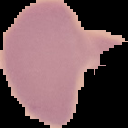

In [6]:
load_img('cell-images-for-detecting-malaria/cell-images/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png',)

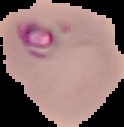

In [84]:
load_img('cell-images-for-detecting-malaria/cell-images/Parasitized/C39P4thinF_original_IMG_20150622_111206_cell_87.png')

# 

# <font color = 'green'>Pre-Processing images</font>

### Data-Augmentation

In [7]:



train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cell-images-for-detecting-malaria/cell-images/',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('cell-images-for-detecting-malaria/cell-images/',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 27531 images belonging to 2 classes.
Found 27531 images belonging to 2 classes.


### training_set * batch size 
    431 * 64 =27584

In [86]:
len(training_set) 

431

In [87]:
len(test_set)

431

# 

# <font color = 'Courier New'>CNN Model Architecture</font>

In [8]:
# Initialising the CNN
Model = Sequential()


# Step 1 - Convolution layer 1
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Step 2 - Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 Dropout layers - Regularization technique
Model.add(Dropout(rate=0.2))



# step 4 convolutional layer 2
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Step 5 - Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 6 - Dropout
Model.add(Dropout(rate=0.2))



# Step 7 -Convolution layer 3
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

#step 8 Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

#step 9 Dropout
Model.add(Dropout(rate=0.2))


# Step 10 - Flattening
Model.add(Flatten())

# Step 11 - Full connected neuron layer
Model.add(Dense(units = 256, activation = 'relu')) 
Model.add(Dropout(rate=0.2))

Model.add(Dense(units = 128, activation = 'relu'))
Model.add(Dropout(rate=0.2))

Model.add(Dense(units = 1, activation = 'sigmoid'))

In [9]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

# 

# <font color = 'Orange'>Compile & Training the Model</font>

In [152]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Early stopping Regularization - To prevent overfitting problem

In [153]:
earlystop= EarlyStopping(monitor='val_accuracy', patience=3)

## Training the Model

In [154]:
history=Model.fit(training_set,batch_size=64,
                         verbose = 1,
                         steps_per_epoch = len(training_set),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps=len(test_set),
                        callbacks=[earlystop])
                         

Epoch 1/20
431/431 [==============================] - 101s 232ms/step - loss: 0.4374 - accuracy: 0.7629 - val_loss: 0.1672 - val_accuracy: 0.9505
Epoch 2/20
431/431 [==============================] - 95s 222ms/step - loss: 0.1683 - accuracy: 0.9478 - val_loss: 0.1645 - val_accuracy: 0.9535
Epoch 3/20
431/431 [==============================] - 95s 222ms/step - loss: 0.1546 - accuracy: 0.9535 - val_loss: 0.1409 - val_accuracy: 0.9571
Epoch 4/20
431/431 [==============================] - 96s 222ms/step - loss: 0.1515 - accuracy: 0.9526 - val_loss: 0.1356 - val_accuracy: 0.9555
Epoch 5/20
431/431 [==============================] - 96s 223ms/step - loss: 0.1437 - accuracy: 0.9562 - val_loss: 0.1295 - val_accuracy: 0.9586
Epoch 6/20
431/431 [==============================] - 99s 230ms/step - loss: 0.1379 - accuracy: 0.9558 - val_loss: 0.1282 - val_accuracy: 0.9609
Epoch 7/20
431/431 [==============================] - 105s 245ms/step - loss: 0.1370 - accuracy: 0.9562 - val_loss: 0.1308 - val_

In [155]:
s=summary = pd.DataFrame(Model.history.history)
#print( pd.DataFrame(Model.history.history))
s

,loss,accuracy,val_loss,val_accuracy
0,0.437436,0.762885,0.167164,0.950529
1,0.168303,0.947841,0.164547,0.953507
2,0.154580,0.953543,0.140911,0.957067
3,0.151455,0.952635,0.135607,0.955468
4,0.143676,0.956231,0.129513,0.958556
5,0.137899,0.955795,0.128235,0.960880
6,0.136997,0.956195,0.130841,0.959718
7,0.134133,0.957684,0.126263,0.962733
8,0.130509,0.957611,0.133403,0.959936
9,0.129808,0.958846,0.115316,0.962370


# <font color='violet'>Test Accuracy<font/>

In [156]:
print('Test Accuracy : {:.2f}%'.format(Model.evaluate(test_set)[1]*100))

431/431 [==============================] - 27s 62ms/step - loss: 0.1120 - accuracy: 0.9656
Test Accuracy : 96.56%


# Save the Model

In [160]:
Model.save("Malariagit97_final.h5")

# <font color='aqua'>Visualising Model Performance<font/>

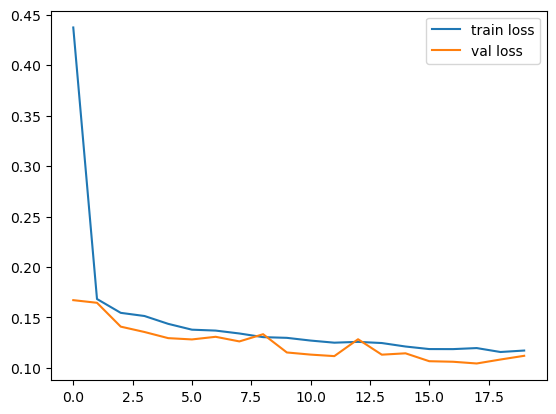

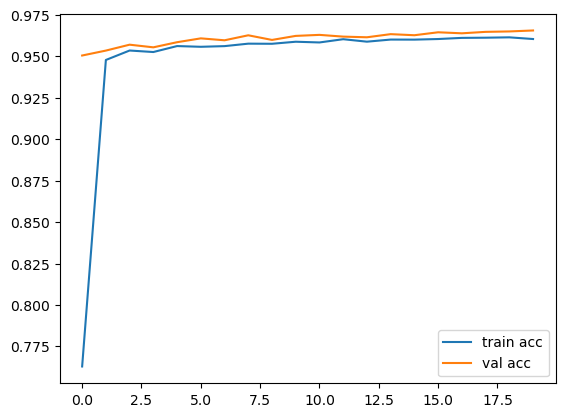

<Figure size 640x480 with 0 Axes>

In [168]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

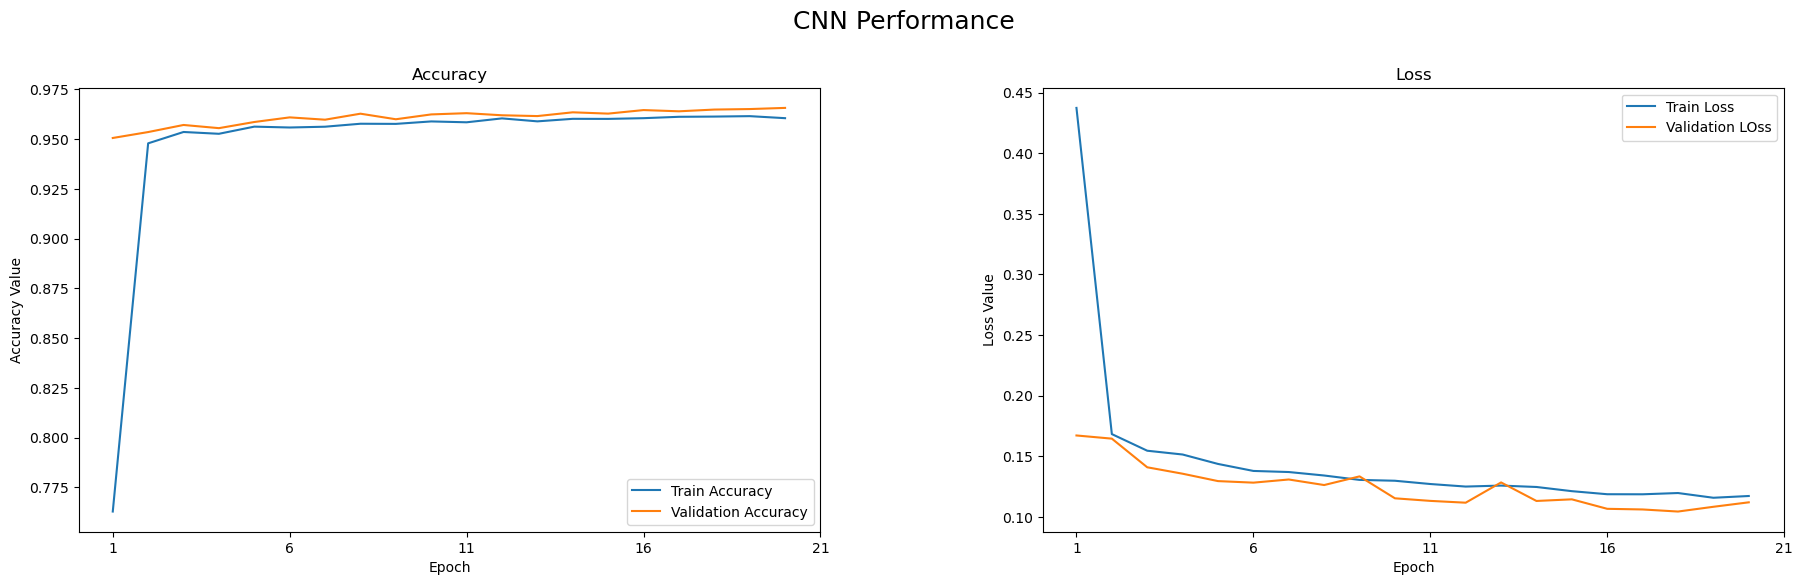

In [166]:
#Plotting Accuracy and loss graph

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6)) 
t = f.suptitle('CNN Performance', fontsize=18) 
f.subplots_adjust(top=0.85, wspace=0.3)
max_epoch = len(history.history['accuracy'])+1 
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label = 'Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list, history.history['loss'], label = 'Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label = 'Validation LOss')
ax2.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")

# <font color='red'>Predictions with the Model<font/>

In [26]:
Model=load_model("Malariagit97_final.h5") 
Model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)      

### Loading sample images

In [13]:
test_image=load_img("C:/Users/gokul/Project_Malaria/Kaggle_Cnn/cell-images-for-detecting-malaria/cell-images/Uninfected/C2NThinF_IMG_20150604_114815_cell_235.png",target_size=(64,64))

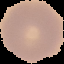

In [14]:
test_image

In [15]:
def Predictions(test_image):
    test_image = np.array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = Model.predict(test_image)
   
    if result[0][0] == 0:
        return 'Parasitized'
    else:
        return 'Uninfected'

In [16]:
Predictions(test_image)

1/1 [==============================] - 2s 2s/step


'Uninfected'

#  <center><font color = 'REd'>Thank You ! <font/><center/>